In [ ]:
!pip install -Uqq fastbook
from fastbook import *

     |████████████████████████████████| 720 kB 5.1 MB/s 
     |████████████████████████████████| 1.2 MB 14.5 MB/s 
     |████████████████████████████████| 46 kB 1.9 MB/s 
     |████████████████████████████████| 189 kB 32.0 MB/s 
     |████████████████████████████████| 56 kB 2.3 MB/s 
     |████████████████████████████████| 51 kB 194 kB/s 


In [1]:
!pip install voila
!jupyter serverextension enable --sys-prefix voila

Enabling: voila
- Writing config: /usr/etc/jupyter
    - Validating...
Error loading server extension voila
      X is voila importable?


In [ ]:
tiger_types = 'South China', 'toy', 'white'
path = Path('tigers')

In [ ]:
if not path.exists():
    path.mkdir()
    for o in tiger_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_ddg(f'{o} tiger', max_images = 100+100)
        download_images(dest, urls=results)

In [ ]:
tigers = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [ ]:
dls = tigers.dataloaders(path)

In [ ]:
tigers = tigers.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = tigers.dataloaders(path)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:766.)
  ret = func(*args, **kwargs)


In [ ]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(6)

epoch,train_loss,valid_loss,error_rate,time
0,1.030385,0.278902,0.095238,02:15


epoch,train_loss,valid_loss,error_rate,time
0,0.202060,0.178138,0.047619,03:03
1,0.155504,0.190263,0.047619,03:08
2,0.120543,0.283405,0.040816,03:03
3,0.096138,0.329986,0.047619,03:03
4,0.081585,0.344495,0.061224,03:07
5,0.069469,0.329180,0.054422,03:04


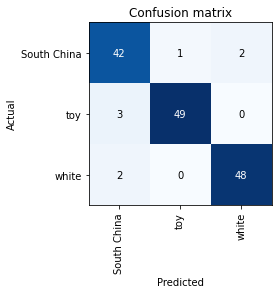

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
learn.export()

In [ ]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [ ]:
learn_inf = load_learner(path/'export.pkl')

In [ ]:
learn_inf.predict('images/1.jpg')

('white', TensorBase(2), TensorBase([2.2341e-08, 2.3313e-09, 1.0000e+00]))

In [ ]:
learn_inf.dls.vocab

['South China', 'toy', 'white']

In [ ]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [ ]:
btn_upload = SimpleNamespace(data = ['images/1.jpg'])

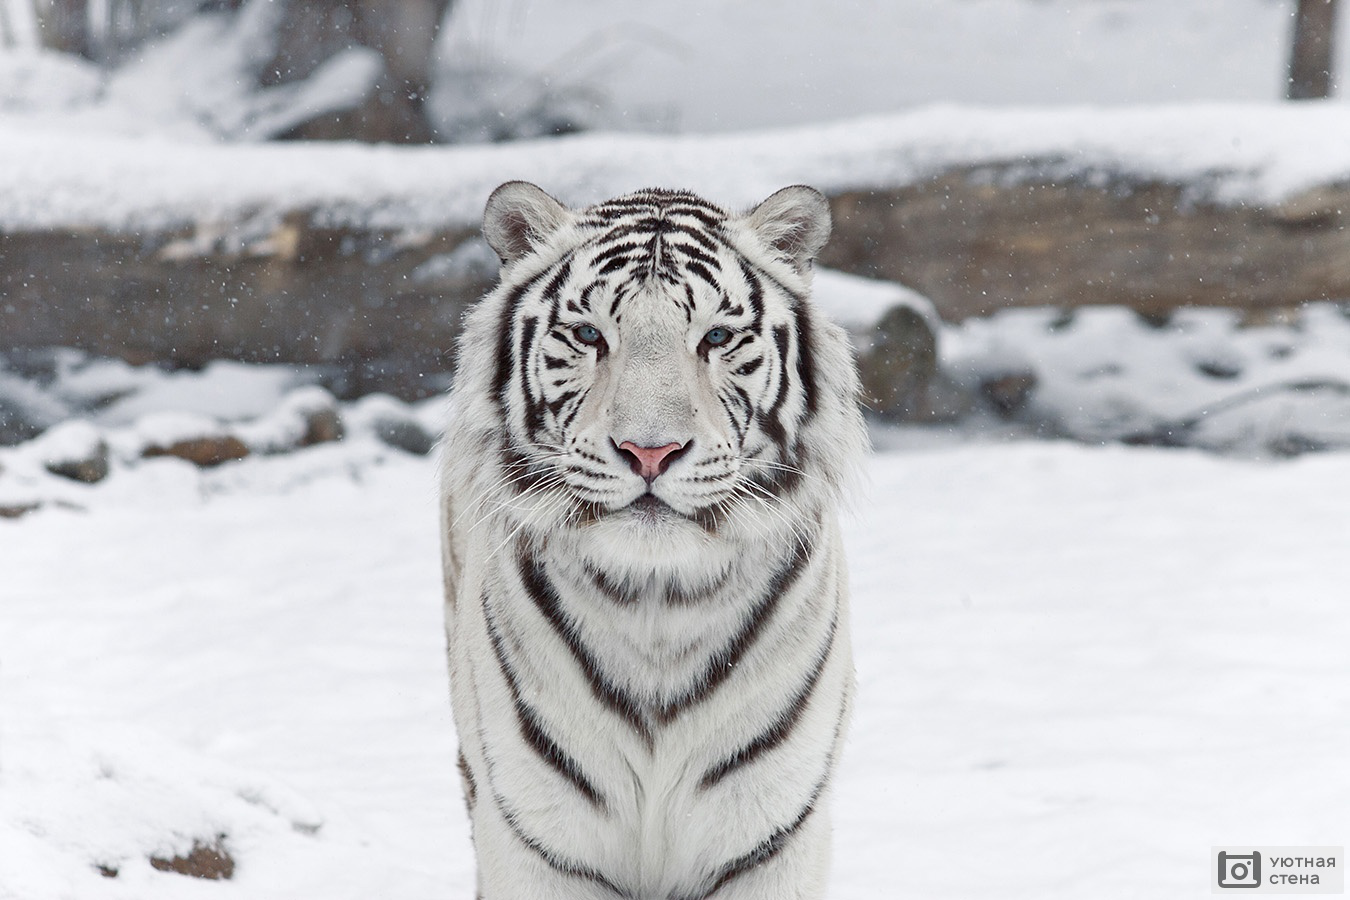

In [ ]:
img = PILImage.create(btn_upload.data[-1])
img

In [ ]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [ ]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [ ]:
pred,pred_idx,probs = learn_inf.predict(img)

In [ ]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: white; Probability: 1.0000')

In [ ]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [ ]:
btn_upload = widgets.FileUpload()

In [ ]:
vb=widgets.VBox([widgets.Label('Select your tiger!'),btn_upload, btn_run, out_pl, lbl_pred])
vb